In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Dataset : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST 
elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.isnull().values.any()

False

Text(0, 0.5, 'no of records')

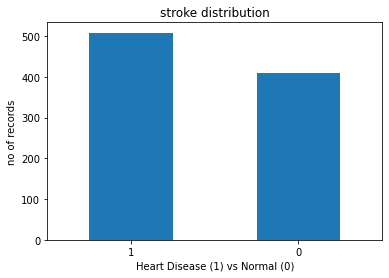

In [5]:
LABELS = ["1", "0"]
count_classes = pd.value_counts(df['HeartDisease'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("stroke distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Heart Disease (1) vs Normal (0)")
plt.ylabel("no of records")

In [6]:
def convert_category_to_numeric(df,column):
    category_list = df[column].unique()
    category_list_size = len(category_list)
    key_value_pair = {}
    for i in range(category_list_size):
        key_value_pair[category_list[i]] = i
    df[column] = df[column].map(key_value_pair)
    return df

In [8]:
df = convert_category_to_numeric(df,'ChestPainType')
df = convert_category_to_numeric(df,'Sex')
df = convert_category_to_numeric(df,'RestingECG')
df = convert_category_to_numeric(df,'ExerciseAngina')
df = convert_category_to_numeric(df,'ST_Slope')

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


In [10]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,1.452070,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,0.638344,0.553377
std,9.432617,0.407701,0.851832,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,1.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,2.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,0.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [12]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [13]:
df['HeartDisease'] = df['HeartDisease'].replace({0: 'Healthy', 1: 'Heart_problem'}) #only visualize the plot

X=df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR',
     'ExerciseAngina','Oldpeak','ST_Slope']]
Y=df['HeartDisease']

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, Y, test_size=0.30, random_state=0)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

DT = DecisionTreeClassifier(random_state=0)

params={'max_depth':np.arange(2,10),'criterion':['entropy','gini']}
kf=KFold(n_splits=5,shuffle=True,random_state=0)
GS=GridSearchCV(DT,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='f1_weighted')

In [17]:
GS.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [18]:
dt_reg=DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dt_reg.fit(X_train,y_train)

y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)


In [19]:
from sklearn import metrics

acc_train=metrics.accuracy_score(y_train,y_train_pred)
print("Train Accuracy : ",acc_train*100)
acc_test=metrics.accuracy_score(y_test,y_test_pred)
print("Test Accuracy : ",acc_test*100)

from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

#validate model performance using K-fold Cross Validation using roc scoring
kf=KFold(n_splits=5,shuffle=True,random_state=0)
scores=cross_val_score(dt_reg,X_std,Y,cv=kf,scoring='f1_weighted')

print("Bias Error : ",np.mean(scores))

print("Varience : ",np.std(scores, ddof= 1))

Train Accuracy :  89.8753894080997
Test Accuracy :  81.88405797101449
Bias Error :  0.8439809372790024
Varience :  0.036724998184595785


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

In [21]:
#Tuning the n_estimator for Random Forest with customized GridSearchCV
RF_ve=[]
RF_be=[]
for i in np.arange(1,100):
    RF=RandomForestClassifier(n_estimators=i,criterion='entropy',random_state=0)
    kf=KFold(n_splits=5,shuffle=True,random_state=0)
    scores=cross_val_score(RF,X_std,Y,cv=kf,scoring='f1_weighted')
    RF_be.append(np.mean(1-scores))
    RF_ve.append(np.std(1-scores,ddof=1))

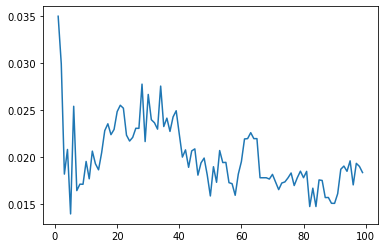

In [22]:
x_axis=np.arange(1,100)
plt.plot(x_axis,RF_ve)

In [23]:
print(np.min(RF_ve))
print(np.argmin(RF_ve))

0.01394581340214201
4


In [24]:
RF=RandomForestClassifier(n_estimators=4,criterion='entropy',random_state=0)
kf=KFold(n_splits=5,shuffle=True,random_state=0)
scores=cross_val_score(RF,X_std,Y,cv=kf,scoring='f1_weighted')
print("Bias Error : ",np.mean(scores)) #because of bagging
print("Varience : ",np.std(scores, ddof= 1)) #because of bootstrap sampling

Bias Error :  0.8052751170916796
Varience :  0.020814068582993298


In [25]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
params={'n_estimators':np.arange(2,100)}
kf=KFold(n_splits=5,shuffle=True,random_state=0)
GS=GridSearchCV(ada,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(random_state=0),
             param_grid={'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [26]:
GS.best_score_

0.8657987879450927

In [27]:
GS.best_estimator_

AdaBoostClassifier(n_estimators=19, random_state=0)

In [28]:
ac = AdaBoostClassifier(n_estimators=19, random_state=0)
ac.fit(X_train,y_train)

y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)

In [29]:
from sklearn import metrics

acc_train=metrics.accuracy_score(y_train,y_train_pred)
print("Train Accuracy : ",acc_train*100)
acc_test=metrics.accuracy_score(y_test,y_test_pred)
print("Test Accuracy : ",acc_test*100)

from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

#validate model performance using K-fold Cross Validation using roc scoring
kf=KFold(n_splits=5,shuffle=True,random_state=0)
scores=cross_val_score(dt_reg,X_std,Y,cv=kf,scoring='f1_weighted')

print("Bias Error : ",np.mean(scores))

print("Varience : ",np.std(scores, ddof= 1))

Train Accuracy :  89.8753894080997
Test Accuracy :  81.88405797101449
Bias Error :  0.8439809372790024
Varience :  0.036724998184595785
